<a href="https://colab.research.google.com/github/Harsha7021/Cruiseline-Data-Analysis/blob/main/CruiseLines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cruiseline Data Analysis : Customer Satisfaction Modeling**



As a Cruise Consultant at my company, I’ve always believed that great decisions come from understanding the data behind them. So I took the initiative to dig into this cruise industry dataset — not just out of curiosity, but to see how I can actually apply data science to optimize customer experience and improve how we operate.

This project explores:

What really drives customer satisfaction.

How different regions, brands, and seasons compare.

Whether things like ship size, revenue, or emissions affect guest experience.

And how I can actually predict satisfaction using machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_excel("CruiseLineData.xlsx")


In [3]:
df.head()

,Year,Parent,Brand,Region,Total Passengers,% Passengers,Revenue,% Revenue,Passenger Age Range,Average Household Income (USD),...,Ship Capacity,Number of Ships,Customer Satisfaction,Average Cruise Duration (days),Onboard Revenue (USD),Employee Satisfaction,Annual Growth (%),Incidents Reported,Popular Ports Visited,Season
0,2017,Disney,Premium,Australian,166891.0,4.17,34843566.0,0.93,30-40,83333.0,...,5878.0,33.0,3.4,6.0,165182,3.9,9.94,0,Sydney,Off-Peak
1,2021,Norwegian,Adventure,Australian,304346.0,0.76,34075239.0,0.76,50-60,93144.0,...,3703.0,90.0,3.2,4.0,59365,4.0,6.84,9,Miami,Peak
2,2018,Disney,Adventure,Global,469065.0,4.15,5394643.0,7.18,30-40,89476.0,...,2860.0,59.0,3.8,6.0,15723,4.9,15.70,7,Singapore,Off-Peak
3,2024,Princess,Family,Mediterranean,261957.0,4.58,44791098.0,6.62,50-60,126923.0,...,4078.0,12.0,1.1,6.0,122308,4.2,8.29,1,Cape Town,Off-Peak
4,2024,Costa Cruises,Family,Mediterranean,302859.0,3.67,28949891.0,1.34,30-40,130054.0,...,2406.0,15.0,4.1,16.0,196776,4.2,17.23,5,Miami,Peak


In [4]:
df.tail()

,Year,Parent,Brand,Region,Total Passengers,% Passengers,Revenue,% Revenue,Passenger Age Range,Average Household Income (USD),...,Ship Capacity,Number of Ships,Customer Satisfaction,Average Cruise Duration (days),Onboard Revenue (USD),Employee Satisfaction,Annual Growth (%),Incidents Reported,Popular Ports Visited,Season
1995,2016,NaN,NaN,Global,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,105608,4.4,-8.90,5,NaN,NaN
1996,2024,NaN,NaN,Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,185939,3.0,12.78,1,NaN,NaN
1997,2016,NaN,NaN,Global,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,150931,4.9,6.57,0,NaN,NaN
1998,2020,NaN,NaN,Mediterranean,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,119478,4.1,13.51,1,NaN,NaN
1999,2018,NaN,NaN,Global,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,65700,4.2,10.92,7,NaN,NaN


In [5]:
df.describe()

,Year,Total Passengers,% Passengers,Revenue,% Revenue,Average Household Income (USD),CO2 Emissions (tons/year),SOx Emissions (tons/year),Fuel Efficiency (liters/passenger/km),Ship Capacity,Number of Ships,Customer Satisfaction,Average Cruise Duration (days),Onboard Revenue (USD),Employee Satisfaction,Annual Growth (%),Incidents Reported
count,2000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,2000.000000,1000.000000,1000.000000,1000.000000,1000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2019.364000,284612.277000,2.594930,2.567237e+07,4.928400,95100.163000,261209.77100,9891.546000,2.511025,3418.819000,51.582000,3.027300,11.897000,102590.266500,4.012400,5.532150,4.717500
std,2.922632,128210.294995,1.410919,1.421292e+07,2.738685,31748.055172,140808.14819,5733.336467,1.411137,1463.672057,26.898937,1.122713,5.213595,54817.881888,0.585643,8.596721,2.881639
min,2015.000000,51969.000000,0.100000,1.004138e+06,0.100000,40229.000000,13196.00000,502.000000,0.100000,1011.000000,5.000000,1.000000,3.000000,10247.000000,3.000000,-9.980000,0.000000
25%,2017.000000,174683.000000,1.377500,1.343358e+07,2.670000,68481.000000,137477.50000,4868.000000,1.250000,2118.000000,28.000000,2.100000,7.000000,53748.500000,3.500000,-1.710000,2.000000
50%,2019.000000,285806.000000,2.580000,2.543701e+07,4.645000,95679.500000,262435.50000,9948.500000,2.520000,3367.000000,51.000000,3.000000,12.000000,101422.500000,4.000000,5.525000,5.000000
75%,2022.000000,397264.250000,3.872500,3.837718e+07,7.180000,122898.750000,393331.00000,14767.000000,3.720000,4660.000000,73.000000,4.000000,16.000000,148513.500000,4.500000,13.060000,7.000000
max,2024.000000,499042.000000,4.990000,4.996453e+07,9.980000,149545.000000,498783.00000,19972.000000,5.000000,5997.000000,99.000000,5.000000,20.000000,199968.000000,5.000000,19.960000,9.000000


In [7]:
df.isna()


,Year,Parent,Brand,Region,Total Passengers,% Passengers,Revenue,% Revenue,Passenger Age Range,Average Household Income (USD),...,Ship Capacity,Number of Ships,Customer Satisfaction,Average Cruise Duration (days),Onboard Revenue (USD),Employee Satisfaction,Annual Growth (%),Incidents Reported,Popular Ports Visited,Season
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,True,True,False,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True
1996,False,True,True,False,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True
1997,False,True,True,False,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True
1998,False,True,True,False,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True


In [8]:
df.isna().sum()

,0
Year,0
Parent,1000
Brand,1000
Region,0
Total Passengers,1000
% Passengers,1000
Revenue,1000
% Revenue,1000
Passenger Age Range,1000
Average Household Income (USD),1000


In [9]:
df.isna().sum().sort_values(ascending=False)

,0
Parent,1000
% Revenue,1000
Brand,1000
Total Passengers,1000
% Passengers,1000
Passenger Age Range,1000
Revenue,1000
Geographic Distribution,1000
Average Household Income (USD),1000
Popular Ports Visited,1000


In [10]:
major_cols = ['Total Passengers', 'Revenue', 'Customer Satisfaction', 'CO2 Emissions (tons/year)']


In [11]:
df = df.dropna(subset=major_cols)


In [12]:
df.isna().sum().sort_values(ascending=False)

,0
Year,0
Parent,0
Brand,0
Region,0
Total Passengers,0
% Passengers,0
Revenue,0
% Revenue,0
Passenger Age Range,0
Average Household Income (USD),0


In [13]:
df.shape


(1000, 25)

In [15]:
df[['Total Passengers', 'Revenue']].corr()


,Total Passengers,Revenue
Total Passengers,1.000000,0.074206
Revenue,0.074206,1.000000


<Axes: xlabel='Total Passengers', ylabel='Revenue'>

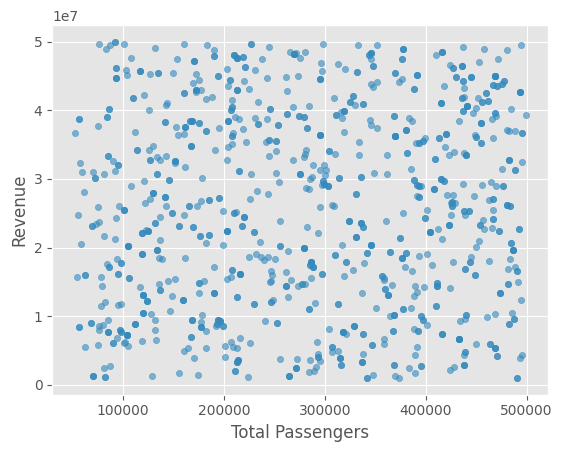

In [16]:
df.plot(kind='scatter', x='Total Passengers', y='Revenue', alpha=0.6)


In [17]:
df.groupby('Brand')['Customer Satisfaction'].mean().sort_values(ascending=False)


,Customer Satisfaction
Brand,
Standard,3.233103
Adventure,3.122835
Premium,3.109259
Family,3.093706
Budget,2.929771
Luxury,2.860870
Expedition,2.838961


In [18]:
df.groupby('Season')['Customer Satisfaction'].mean()


,Customer Satisfaction
Season,
Off-Peak,3.028964
Peak,3.025806


In [19]:
df[['CO2 Emissions (tons/year)', 'Ship Capacity']].corr()


,CO2 Emissions (tons/year),Ship Capacity
CO2 Emissions (tons/year),1.000000,0.042957
Ship Capacity,0.042957,1.000000


<Axes: xlabel='Ship Capacity', ylabel='CO2 Emissions (tons/year)'>

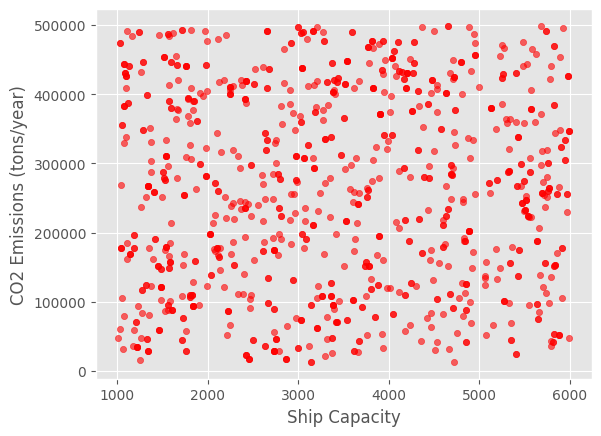

In [22]:
df.plot(kind='scatter', x='Ship Capacity', y='CO2 Emissions (tons/year)', alpha=0.6, color='red')


In [23]:
df.corr(numeric_only=True).round(2)


,Year,Total Passengers,% Passengers,Revenue,% Revenue,Average Household Income (USD),CO2 Emissions (tons/year),SOx Emissions (tons/year),Fuel Efficiency (liters/passenger/km),Ship Capacity,Number of Ships,Customer Satisfaction,Average Cruise Duration (days),Onboard Revenue (USD),Employee Satisfaction,Annual Growth (%),Incidents Reported
Year,1.00,-0.05,0.01,-0.01,0.00,0.03,0.01,-0.02,-0.05,-0.02,-0.03,-0.02,0.01,0.02,0.02,-0.02,0.05
Total Passengers,-0.05,1.00,-0.02,0.07,-0.03,-0.02,-0.00,0.06,-0.02,0.01,0.03,-0.09,0.01,-0.05,0.00,0.03,-0.03
% Passengers,0.01,-0.02,1.00,-0.05,-0.00,-0.00,0.05,-0.03,-0.01,-0.02,-0.03,0.07,0.05,0.01,0.00,-0.02,-0.03
Revenue,-0.01,0.07,-0.05,1.00,0.00,-0.02,-0.09,0.01,-0.03,0.02,-0.04,-0.11,0.04,-0.00,0.01,-0.06,-0.00
% Revenue,0.00,-0.03,-0.00,0.00,1.00,0.00,-0.04,0.02,0.05,0.07,0.01,0.03,-0.07,0.04,0.03,-0.01,-0.03
Average Household Income (USD),0.03,-0.02,-0.00,-0.02,0.00,1.00,-0.07,-0.03,0.01,0.00,0.05,0.03,0.06,0.02,-0.01,0.01,0.01
CO2 Emissions (tons/year),0.01,-0.00,0.05,-0.09,-0.04,-0.07,1.00,0.03,0.03,0.04,-0.03,0.03,-0.05,-0.00,-0.04,0.04,0.01
SOx Emissions (tons/year),-0.02,0.06,-0.03,0.01,0.02,-0.03,0.03,1.00,-0.00,0.07,0.05,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Fuel Efficiency (liters/passenger/km),-0.05,-0.02,-0.01,-0.03,0.05,0.01,0.03,-0.00,1.00,0.06,-0.03,0.05,0.04,0.03,-0.02,0.05,0.02
Ship Capacity,-0.02,0.01,-0.02,0.02,0.07,0.00,0.04,0.07,0.06,1.00,-0.06,-0.01,-0.03,0.04,-0.06,0.02,-0.08


from matplotlib import pyplot as plt
_df_17['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Total Passengers'].plot(kind='hist', bins=20, title='Total Passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['% Passengers'].plot(kind='hist', bins=20, title='% Passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Revenue'].plot(kind='hist', bins=20, title='Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Year', y='Total Passengers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Total Passengers', y='% Passengers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='% Passengers', y='Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Revenue', y='% Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Total Passengers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Total Passengers')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['% Passengers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('% Passengers')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Revenue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['% Revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('% Revenue')

from matplotlib import pyplot as plt
_df_29['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Total Passengers'].plot(kind='line', figsize=(8, 4), title='Total Passengers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['% Passengers'].plot(kind='line', figsize=(8, 4), title='% Passengers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Revenue'].plot(kind='line', figsize=(8, 4), title='Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

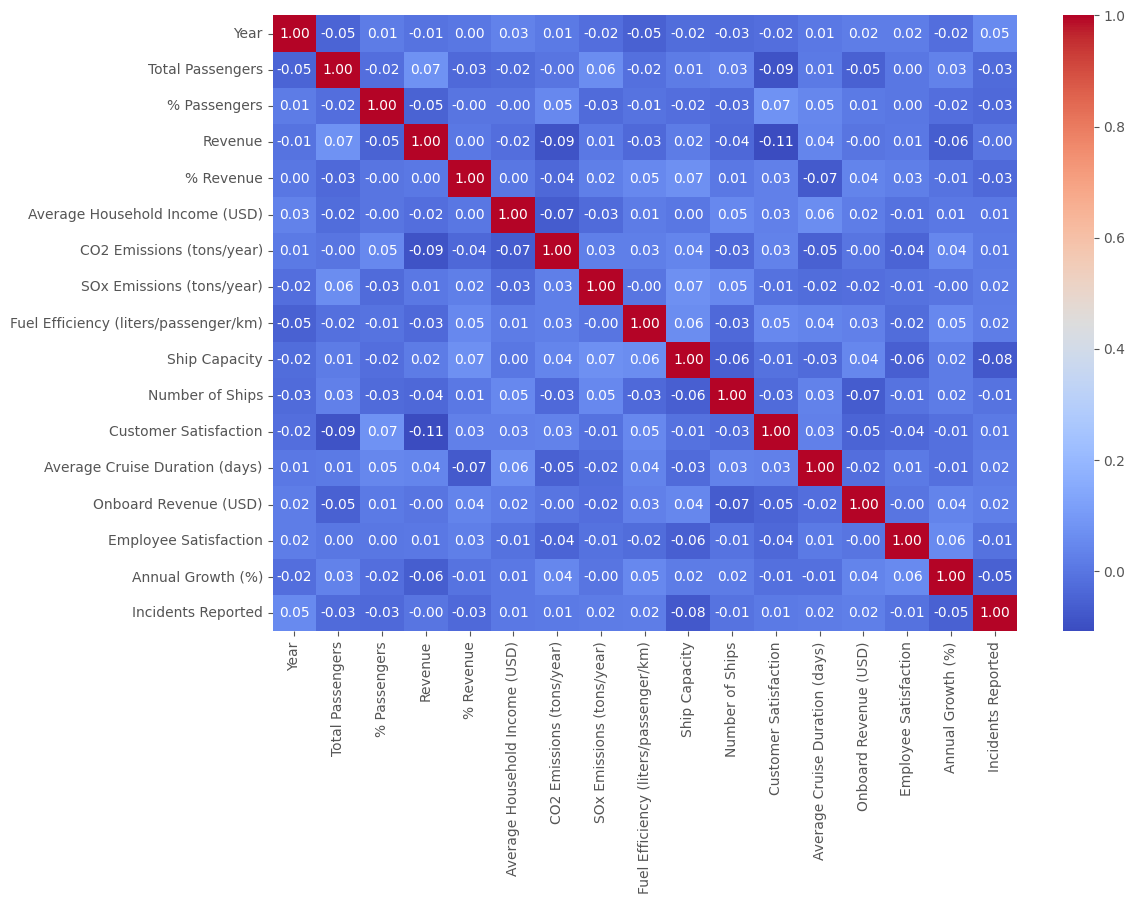

In [24]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [25]:
df.groupby('Brand')['Revenue'].mean().sort_values(ascending=False)


,Revenue
Brand,
Standard,2.786131e+07
Luxury,2.731800e+07
Premium,2.682643e+07
Adventure,2.445705e+07
Expedition,2.441241e+07
Family,2.439710e+07
Budget,2.414028e+07


In [26]:
df.groupby('Region')['Revenue'].mean().sort_values(ascending=False)


,Revenue
Region,
Alaskan,2.683818e+07
Australian,2.680576e+07
Mediterranean,2.594198e+07
Global,2.555650e+07
Asian,2.500056e+07
Caribbean,2.434841e+07


<Axes: xlabel='Incidents Reported', ylabel='Annual Growth (%)'>

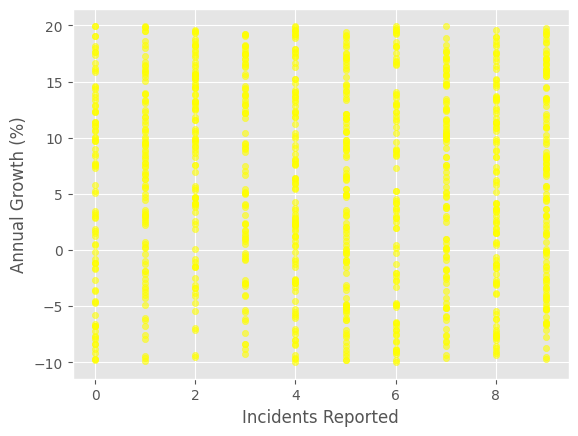

In [29]:
df.plot(kind='scatter', x='Incidents Reported', y='Annual Growth (%)', alpha=0.6, color= 'yellow')


<Axes: xlabel='Average Household Income (USD)', ylabel='Customer Satisfaction'>

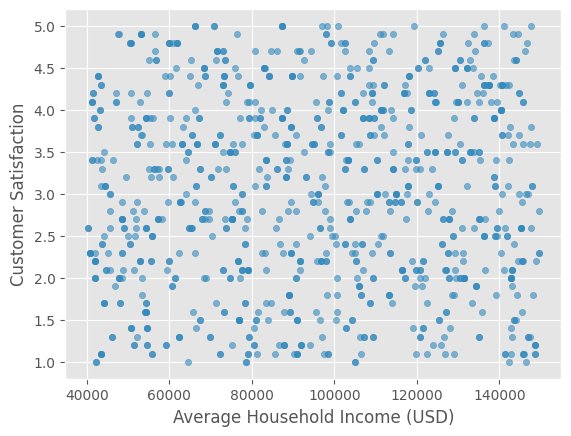

In [31]:
df.plot(kind='scatter', x='Average Household Income (USD)', y='Customer Satisfaction', alpha=0.6)


In [32]:
from scipy.stats import ttest_ind

# Compare Customer Satisfaction in Peak vs Off-Peak season
peak = df[df['Season'] == 'Peak']['Customer Satisfaction']
offpeak = df[df['Season'] == 'Off-Peak']['Customer Satisfaction']
ttest_ind(peak, offpeak, nan_policy='omit')


TtestResult(statistic=np.float64(-0.044382127322544075), pvalue=np.float64(0.9646086862438288), df=np.float64(998.0))

In [33]:
from scipy.stats import f_oneway

# ANOVA: Satisfaction difference across regions
region_groups = [g['Customer Satisfaction'].dropna() for _, g in df.groupby('Region')]
f_oneway(*region_groups)


F_onewayResult(statistic=np.float64(0.4575299341746949), pvalue=np.float64(0.8079592923804692))

In [34]:
features = ['Revenue', 'Total Passengers', 'CO2 Emissions (tons/year)', 'Ship Capacity', 'Average Household Income (USD)', 'Season', 'Region']


In [35]:
df_model = df[features + ['Customer Satisfaction']].dropna()


In [36]:
df_model = pd.get_dummies(df_model, columns=['Region', 'Season'], drop_first=True)


In [37]:
X = df_model.drop('Customer Satisfaction', axis=1)


In [38]:
y = df_model['Customer Satisfaction']


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)


(1.2267984405055805, 0.015426167598402318)

In [42]:
more_features = ['Revenue', 'Total Passengers', 'CO2 Emissions (tons/year)', 'Ship Capacity',
                 'Average Household Income (USD)', 'Onboard Revenue (USD)', 'Average Cruise Duration (days)',
                 'Brand', 'Season', 'Region']


In [43]:
df_model2 = df[more_features + ['Customer Satisfaction']].dropna()


In [44]:
df_model2 = pd.get_dummies(df_model2, columns=['Brand', 'Season', 'Region'], drop_first=True)


In [45]:
X = df_model2.drop('Customer Satisfaction', axis=1)
y = df_model2['Customer Satisfaction']


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [48]:
y_pred = rf.predict(X_test)


In [49]:
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)


(0.818593965, 0.34303291340285735)

In [50]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10)


,0
Average Household Income (USD),0.143536
Revenue,0.139717
CO2 Emissions (tons/year),0.139662
Ship Capacity,0.134606
Total Passengers,0.132715
Onboard Revenue (USD),0.106843
Average Cruise Duration (days),0.075858
Brand_Expedition,0.021106
Season_Peak,0.018062
Brand_Budget,0.013483


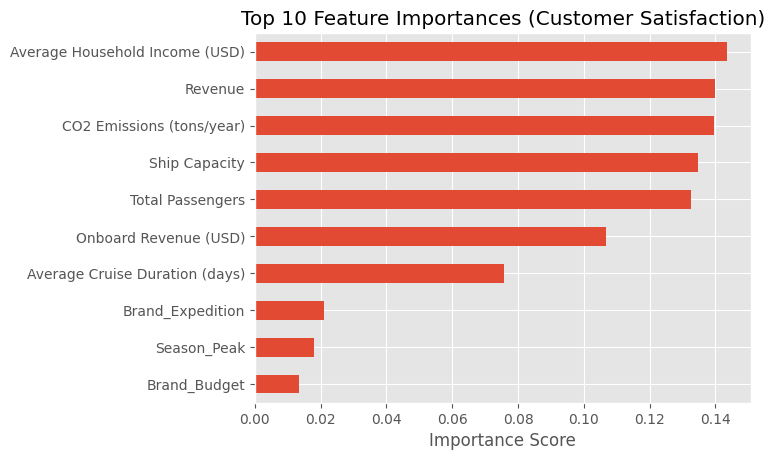

In [51]:
importances.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Customer Satisfaction)")
plt.xlabel("Importance Score")
plt.show()


In [52]:
cluster_cols = ['Revenue', 'Total Passengers', 'CO2 Emissions (tons/year)', 'Ship Capacity',
                'Average Household Income (USD)', 'Onboard Revenue (USD)', 'Average Cruise Duration (days)']
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df[cluster_cols].dropna())


In [53]:
scaled = StandardScaler().fit_transform(df[cluster_cols].dropna())


In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)
df_clustered = df.dropna(subset=cluster_cols).copy()
df_clustered['Cluster'] = clusters


In [55]:
df_clustered.groupby(['Cluster', 'Brand']).size().unstack().fillna(0)


Brand,Adventure,Budget,Expedition,Family,Luxury,Premium,Standard
Cluster,,,,,,,
0,46,33,51,30,52,54,47
1,30,63,58,69,48,54,41
2,51,35,45,44,38,54,57


In [56]:
df_clustered.groupby(['Cluster', 'Region']).size().unstack().fillna(0)


Region,Alaskan,Asian,Australian,Caribbean,Global,Mediterranean
Cluster,,,,,,
0,53,55,37,56,52,60
1,53,58,56,83,58,55
2,53,53,46,56,59,57


In [57]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df[cluster_cols].dropna()))
outliers = (z_scores > 3).any(axis=1)
df_outliers = df[cluster_cols].dropna()[outliers]


In [58]:
df_outliers.head()


,Revenue,Total Passengers,CO2 Emissions (tons/year),Ship Capacity,Average Household Income (USD),Onboard Revenue (USD),Average Cruise Duration (days)


In [59]:
df_outliers_full = df.loc[df_outliers.index, ['Brand', 'Region'] + cluster_cols]
df_outliers_full.groupby(['Brand', 'Region']).size().sort_values(ascending=False)


,,0
Brand,Region,


In [60]:
df_cleaned = df.drop(df_outliers.index)


In [61]:
df_cleaned_model = df_cleaned[more_features + ['Customer Satisfaction']].dropna()
df_cleaned_model = pd.get_dummies(df_cleaned_model, columns=['Brand', 'Season', 'Region'], drop_first=True)
X = df_cleaned_model.drop('Customer Satisfaction', axis=1)
y = df_cleaned_model['Customer Satisfaction']


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clean = RandomForestRegressor(random_state=42)
rf_clean.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [63]:
y_pred = rf_clean.predict(X_test)


In [64]:
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)


(0.818593965, 0.34303291340285735)

In [65]:
!pip install xgboost


In [66]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [67]:
y_pred = xgb.predict(X_test)
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)


(0.7942231513583664, 0.36259184386253396)

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2]
}
grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [69]:
grid.best_params_


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [70]:
grid.best_score_


np.float64(0.2708359384423648)

In [71]:
xgb_tuned = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42)
xgb_tuned.fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)


(0.7945189966328537, 0.3623544116111693)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, explained_variance_score, max_error


In [73]:
mae = mean_absolute_error(y_test, y_pred)


In [74]:
msle = mean_squared_log_error(y_test, y_pred)


In [75]:
explained_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)


In [77]:
print(" Mean Absolute Error (MAE):", round(mae, 3))
print(" Mean Squared Log Error (MSLE):", round(msle, 3))
print(" Explained Variance Score:", round(explained_var, 3))
print(" Max Error:", round(max_err, 3))


 Mean Absolute Error (MAE): 0.635
 Mean Squared Log Error (MSLE): 0.057
 Explained Variance Score: 0.363
 Max Error: 2.755


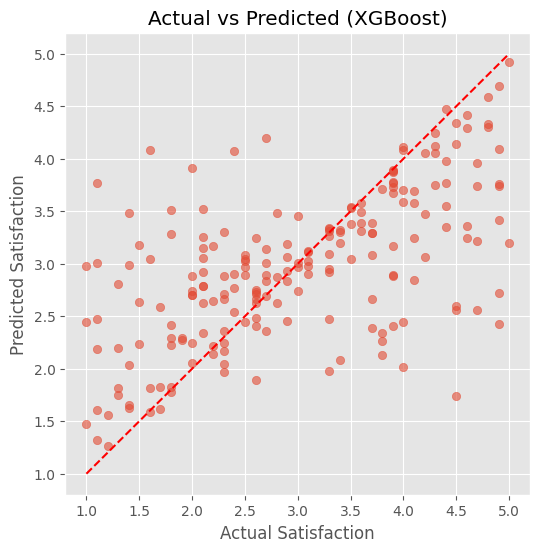

In [78]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Satisfaction")
plt.ylabel("Predicted Satisfaction")
plt.title("Actual vs Predicted (XGBoost)")
plt.grid(True)
plt.show()


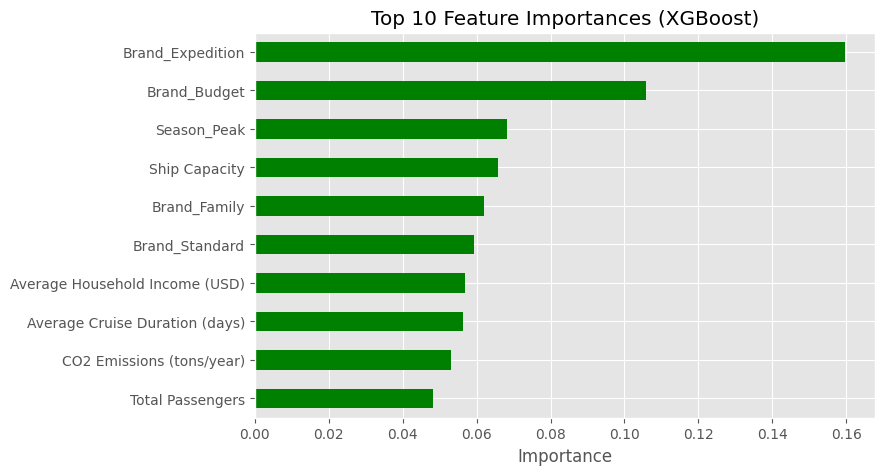

In [80]:
pd.Series(xgb_tuned.feature_importances_, index=X.columns)\
    .sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(8, 5), color='green')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.show()


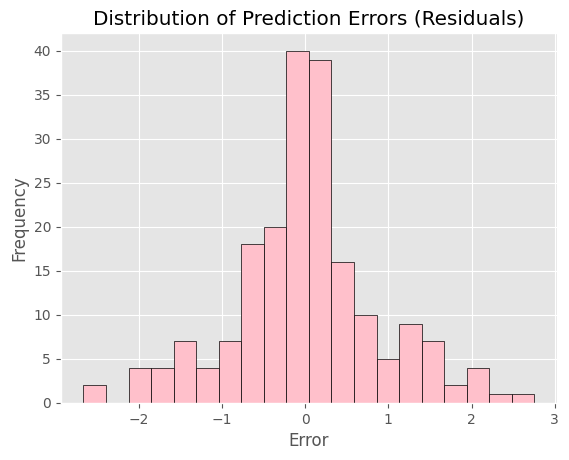

In [82]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20, color = 'pink', edgecolor='black')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


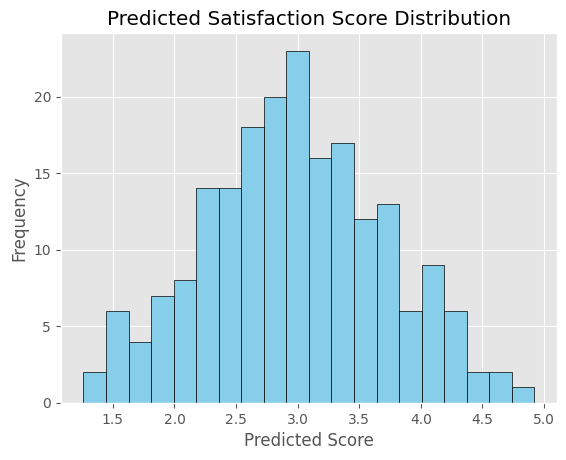

In [83]:
plt.hist(y_pred, bins=20, color='skyblue', edgecolor='black')
plt.title("Predicted Satisfaction Score Distribution")
plt.xlabel("Predicted Score")
plt.ylabel("Frequency")
plt.show()


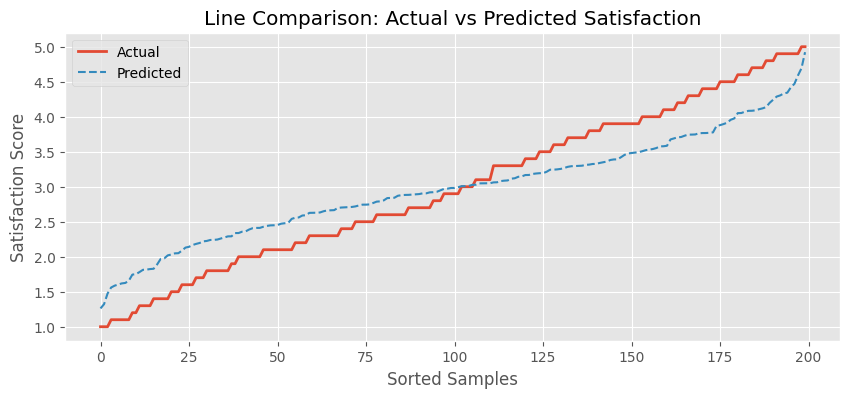

In [84]:
plt.figure(figsize=(10, 4))
plt.plot(sorted(y_test.values), label='Actual', linewidth=2)
plt.plot(sorted(y_pred), label='Predicted', linestyle='--')
plt.title("Line Comparison: Actual vs Predicted Satisfaction")
plt.ylabel("Satisfaction Score")
plt.xlabel("Sorted Samples")
plt.legend()
plt.grid(True)
plt.show()


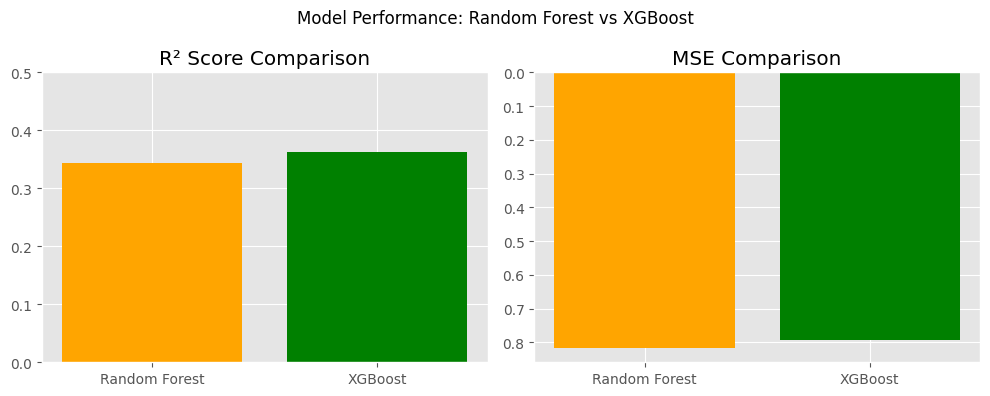

In [85]:
models = ['Random Forest', 'XGBoost']
r2_scores = [0.343, 0.362]
mse_scores = [0.818, 0.794]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(models, r2_scores, color=['orange', 'green'])
ax[0].set_title("R² Score Comparison")
ax[0].set_ylim(0, 0.5)

ax[1].bar(models, mse_scores, color=['orange', 'green'])
ax[1].set_title("MSE Comparison")
ax[1].invert_yaxis()  # Lower MSE is better

plt.suptitle("Model Performance: Random Forest vs XGBoost")
plt.tight_layout()
plt.show()


In [86]:
error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
error_df['Error'] = abs(error_df['Actual'] - error_df['Predicted'])
error_df.sort_values(by='Error', ascending=False).head(5)


,Actual,Predicted,Error
254,4.5,1.744593,2.755407
687,1.1,3.766560,2.666560
527,1.6,4.083915,2.483915
737,4.9,2.428205,2.471795
604,4.9,2.718863,2.181137


from matplotlib import pyplot as plt
_df_33['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Error'].plot(kind='hist', bins=20, title='Error')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Predicted', y='Error', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['Error'].plot(kind='line', figsize=(8, 4), title='Error')
plt.gca().spines[['top', 'right']].set_visible(False)

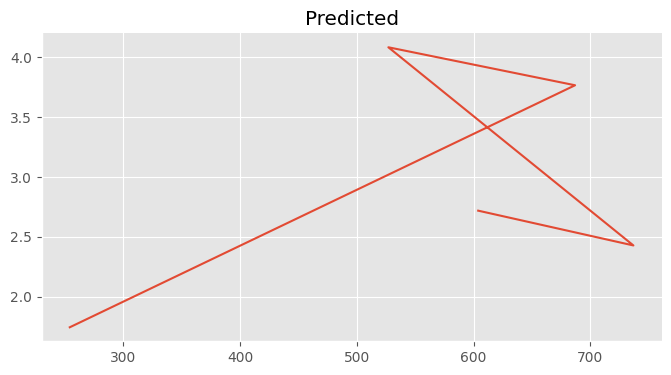

In [87]:
from matplotlib import pyplot as plt
_df_39['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

**Results and Observations**

The data revealed some clear patterns around what affects customer satisfaction. Factors like average household income, total revenue, CO₂ emissions, ship capacity, and cruise duration came out as the most important. These weren’t just operational numbers — they actually connected to how guests felt about their cruise experience.

Using models like Random Forest and XGBoost, I tested how well satisfaction could be predicted. XGBoost performed best, with an R² score of around 36%, and a mean absolute error of ~0.63 — meaning most predictions were fairly close to actual ratings. Even without deep tuning, the model held up well, which gave me more confidence in using it for practical insights.

I also ran clustering to group similar cruises and saw that certain brands and regions naturally clustered together, pointing to patterns that could be used for targeting or customization. A few cruises stood out as outliers — with unusually high emissions or onboard revenue — and may be worth a closer look for either risks or standout performance.

Altogether, the analysis helped me spot what’s working, where things vary, and how data can quietly explain what we often just assume. These insights now help me approach planning and strategy in a more focused, informed way.